# Facial Similarity

Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.

You can do that by using the `face_distance` function.

The model was trained in a way such that faces with a distance of 0.6 or less should be a match. But if you want to be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false positive matches at the risk of more false negatives.

**Note**: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a smaller distance are more similar to each other than ones with a larger distance.

In [1]:
import face_recognition
from matplotlib import pyplot as plt

In [2]:
# Load some images to compare against
known_biden_image_1 = face_recognition.load_image_file("../images/joe_biden_1.jpg")
known_biden_image_2 = face_recognition.load_image_file("../images/joe_biden_2.jpg")

In [3]:
# Get the face encodings for the known images
biden_face_encoding_1 = face_recognition.face_encodings(known_biden_image_1)[0]
biden_face_encoding_2 = face_recognition.face_encodings(known_biden_image_2)[0]

known_encodings = [
    biden_face_encoding_1,
    biden_face_encoding_2
]

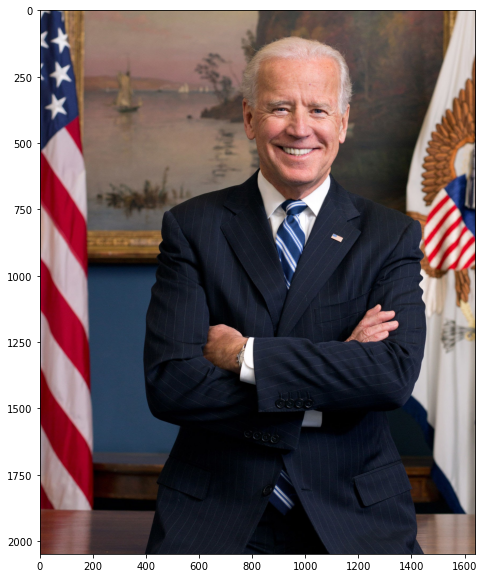

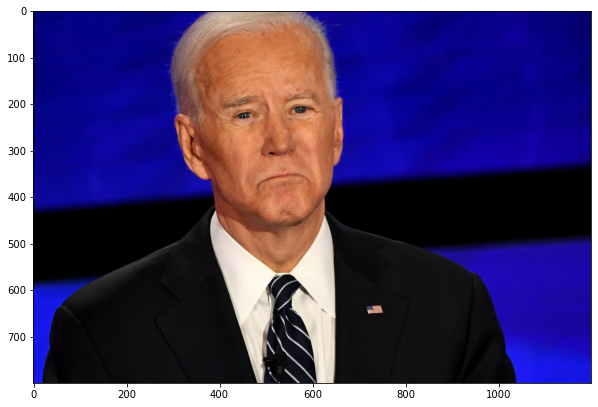

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_1)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(known_biden_image_2)
plt.show()

In [9]:
# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("../images/joe_biden_1.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

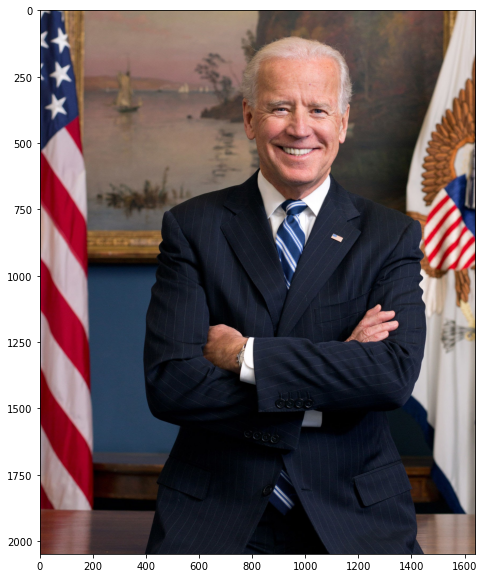

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(image_to_test)
plt.show()

In [11]:
# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

print(face_distances)

[0.         0.46048388]


In [12]:
for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.0 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.46 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

